In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
words = open('data/names.txt', 'r').read().lower().splitlines()

In [3]:
words[:10]

['olivia',
 'emma',
 'ava',
 'charlotte',
 'sophia',
 'amelia',
 'isabella',
 'mia',
 'evelyn',
 'harper']

In [4]:
len(words)

31517

In [5]:
min(len(w) for w in words)

2

In [6]:
max(len(w) for w in words)

14

### Bigram: Figuring out the most probable next character by learning from the position of 2 characters.

Here, we split the individual names in 2 characters and sort them in the ascending order of their frequency in all the names.

In [7]:
b= {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

The simplest way in the bigram language models to learn the statistics of which character is most likely to follow the current character is to count their occurances.

In [8]:
sorted(b.items(), key = lambda kv: kv[1])

[(('q', 's'), 1),
 (('t', 'x'), 1),
 (('m', 'f'), 1),
 (('s', 'f'), 1),
 (('p', 'f'), 1),
 (('z', 'j'), 1),
 (('w', 'w'), 1),
 (('q', 'l'), 1),
 (('f', 'h'), 1),
 (('b', 'c'), 1),
 (('c', 'd'), 1),
 (('p', 'c'), 1),
 (('f', 'z'), 1),
 (('f', 'g'), 1),
 (('z', 'g'), 1),
 (('w', 'f'), 1),
 (('q', 'm'), 1),
 (('f', 'w'), 1),
 (('p', 'k'), 1),
 (('s', 'q'), 1),
 (('p', 'm'), 1),
 (('v', 'b'), 1),
 (('c', 'p'), 1),
 (('m', 'k'), 1),
 (('f', 'j'), 1),
 (('x', 'n'), 1),
 (('k', 'f'), 1),
 (('t', 'f'), 1),
 (('j', 'b'), 1),
 (('g', 'z'), 1),
 (('k', 'x'), 1),
 (('z', 'd'), 1),
 (('k', 'j'), 1),
 (('g', 'f'), 1),
 (('c', 'x'), 1),
 (('h', 'q'), 1),
 (('j', 'p'), 1),
 (('k', 'v'), 1),
 (('w', 'g'), 1),
 (('p', 'b'), 2),
 (('f', 's'), 2),
 (('q', 'r'), 2),
 (('x', 'w'), 2),
 (('t', 'g'), 2),
 (('p', 'j'), 2),
 (('d', 'z'), 2),
 (('q', 'w'), 2),
 (('b', 't'), 2),
 (('f', 'k'), 2),
 (('c', 'j'), 2),
 (('w', 'm'), 2),
 (('k', 'c'), 2),
 (('k', 'd'), 2),
 (('s', 'g'), 2),
 (('h', 'h'), 2),
 (('g', 'b

We will store these bigrams in a (28 * 28) array where the rows will contain the first character of the bigram and the columns will contain the second character.

In [9]:
import torch

In [10]:
N = torch.zeros((27, 27), dtype=torch.int32)

Since, the array can only contain integer values, lets convert the alphabetic characters in integers.

In [11]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [12]:
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [13]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

In [14]:
N[:1]

tensor([[   0, 4393, 1279, 1502, 1622, 1533,  429,  647,  879,  604, 2338, 2928,
         1515, 2456, 1178,  406,  484,   87, 1655, 2037, 1217,   74,  374,  307,
          144,  516,  913]], dtype=torch.int32)

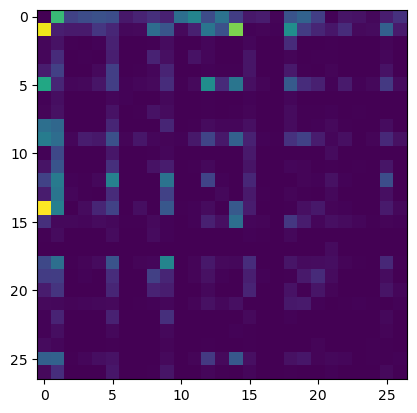

In [15]:
plt.imshow(N)

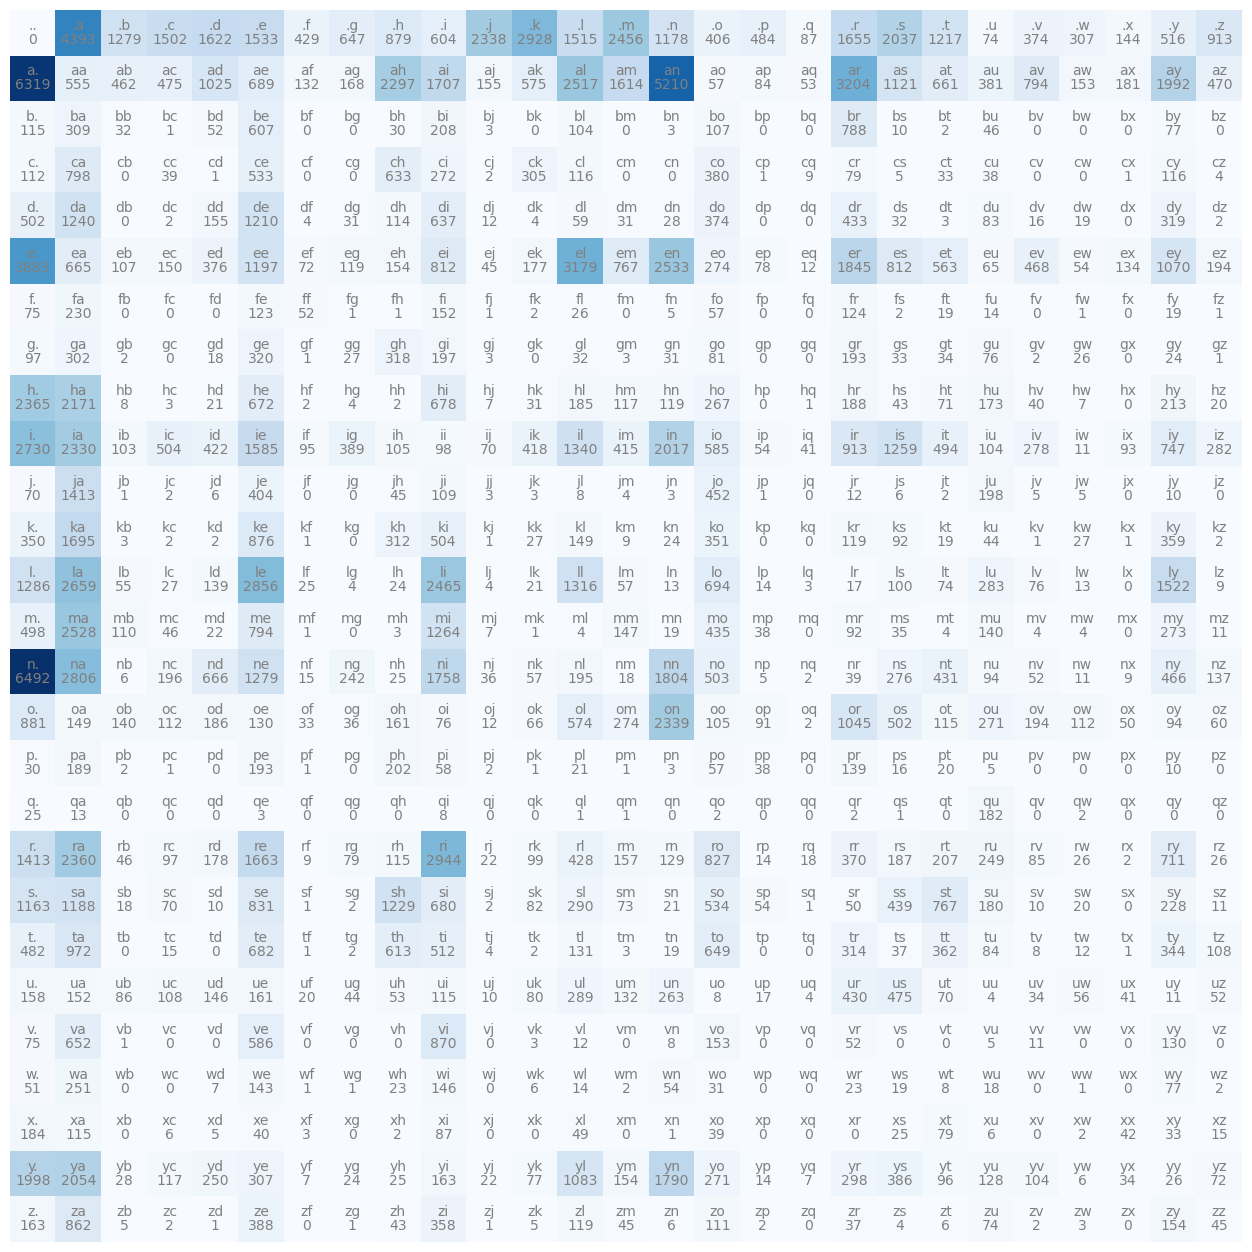

In [16]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='grey')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='grey')
plt.axis('off');

In [17]:
N[0]

tensor([   0, 4393, 1279, 1502, 1622, 1533,  429,  647,  879,  604, 2338, 2928,
        1515, 2456, 1178,  406,  484,   87, 1655, 2037, 1217,   74,  374,  307,
         144,  516,  913], dtype=torch.int32)

In [18]:
p = N[0]
p = p / p.sum()
p

tensor([0.0000, 0.1394, 0.0406, 0.0477, 0.0515, 0.0486, 0.0136, 0.0205, 0.0279,
        0.0192, 0.0742, 0.0929, 0.0481, 0.0779, 0.0374, 0.0129, 0.0154, 0.0028,
        0.0525, 0.0646, 0.0386, 0.0023, 0.0119, 0.0097, 0.0046, 0.0164, 0.0290])

In [19]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
ix

10

In [20]:
itos[ix]

'j'

In [21]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [22]:
torch.multinomial(p, num_samples=20, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [23]:
P = N.float()
P /= P.sum(1, keepdim=True)

In [24]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    out = []
    ix = 0
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

junide.
janasah.
p.
cony.
a.
